<a href="https://www.kaggle.com/code/lalit7881/synthetic-healthcare-patient-journey-79-8-acc?scriptVersionId=295597818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-healthcare-patient-journey-dataset/healthcare_patient_journey.csv


In [2]:
df = pd.read_csv("/kaggle/input/synthetic-healthcare-patient-journey-dataset/healthcare_patient_journey.csv")

In [3]:
df.head()

,patient_id,age,gender,chronic_condition,admission_type,department,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,discharge_status,readmitted_30d,total_cost_€,satisfaction_score
0,1,69,male,0,scheduled,Neurology,41,2,0,3,1,referred,1,1440,2
1,2,38,male,0,emergency,Oncology,17,3,1,2,0,recovered,0,2060,3
2,3,81,male,0,scheduled,Neurology,40,2,3,2,0,recovered,0,2110,3
3,4,67,female,1,emergency,ER,7,4,5,9,0,recovered,0,4070,3
4,5,88,male,1,emergency,Cardiology,34,3,7,5,0,recovered,1,3800,3


In [4]:
df.tail()

,patient_id,age,gender,chronic_condition,admission_type,department,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,discharge_status,readmitted_30d,total_cost_€,satisfaction_score
2995,2996,40,male,0,emergency,Cardiology,41,1,2,1,0,recovered,0,1330,3
2996,2997,21,male,1,scheduled,Polyclinic,54,3,3,2,0,recovered,0,2560,2
2997,2998,72,male,0,scheduled,Neurology,38,1,3,2,0,recovered,0,1660,2
2998,2999,33,female,0,scheduled,Neurology,28,2,4,2,0,recovered,0,2360,2
2999,3000,59,male,1,emergency,Polyclinic,43,5,2,5,0,recovered,1,3450,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           3000 non-null   int64 
 1   age                  3000 non-null   int64 
 2   gender               3000 non-null   object
 3   chronic_condition    3000 non-null   int64 
 4   admission_type       3000 non-null   object
 5   department           3000 non-null   object
 6   wait_time_min        3000 non-null   int64 
 7   length_of_stay_days  3000 non-null   int64 
 8   procedures_count     3000 non-null   int64 
 9   medication_count     3000 non-null   int64 
 10  complications        3000 non-null   int64 
 11  discharge_status     3000 non-null   object
 12  readmitted_30d       3000 non-null   int64 
 13  total_cost_€         3000 non-null   int64 
 14  satisfaction_score   3000 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 351.7+ KB


In [6]:
df.describe()

,patient_id,age,chronic_condition,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,readmitted_30d,total_cost_€,satisfaction_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.051333,0.405667,33.326333,3.535000,2.435667,3.404667,0.160333,0.234667,2772.040000,2.803000
std,866.169729,20.704901,0.491102,17.111559,2.024881,1.595842,1.890883,0.366976,0.423861,1086.215721,0.838506
min,1.000000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,750.000000,1.000000
25%,750.750000,35.000000,0.000000,20.750000,2.000000,1.000000,2.000000,0.000000,0.000000,1900.000000,2.000000
50%,1500.500000,53.000000,0.000000,33.000000,3.000000,2.000000,3.000000,0.000000,0.000000,2670.000000,3.000000
75%,2250.250000,71.000000,1.000000,45.000000,5.000000,3.000000,5.000000,0.000000,0.000000,3490.000000,3.000000
max,3000.000000,89.000000,1.000000,103.000000,11.000000,10.000000,11.000000,1.000000,1.000000,6610.000000,5.000000


In [7]:
df.isnull().sum()

patient_id             0
age                    0
gender                 0
chronic_condition      0
admission_type         0
department             0
wait_time_min          0
length_of_stay_days    0
procedures_count       0
medication_count       0
complications          0
discharge_status       0
readmitted_30d         0
total_cost_€           0
satisfaction_score     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

patient_id              int64
age                     int64
gender                 object
chronic_condition       int64
admission_type         object
department             object
wait_time_min           int64
length_of_stay_days     int64
procedures_count        int64
medication_count        int64
complications           int64
discharge_status       object
readmitted_30d          int64
total_cost_€            int64
satisfaction_score      int64
dtype: object

In [10]:
df.shape

(3000, 15)

In [11]:
df.nunique()

patient_id             3000
age                      72
gender                    2
chronic_condition         2
admission_type            2
department                5
wait_time_min            87
length_of_stay_days      11
procedures_count         11
medication_count         12
complications             2
discharge_status          2
readmitted_30d            2
total_cost_€            383
satisfaction_score        5
dtype: int64

In [12]:
df.columns

Index(['patient_id', 'age', 'gender', 'chronic_condition', 'admission_type',
       'department', 'wait_time_min', 'length_of_stay_days',
       'procedures_count', 'medication_count', 'complications',
       'discharge_status', 'readmitted_30d', 'total_cost_€',
       'satisfaction_score'],
      dtype='object')

## Data visualizations

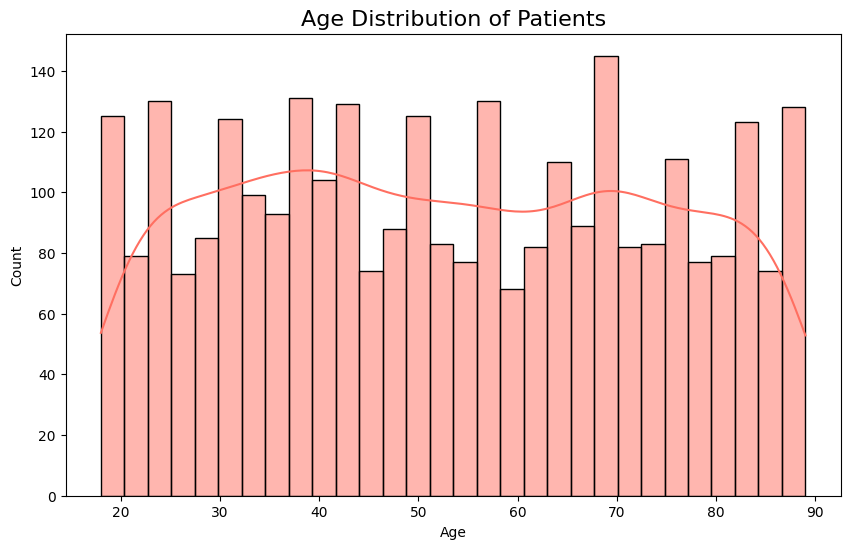

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color="#FF6F61")
plt.title("Age Distribution of Patients", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

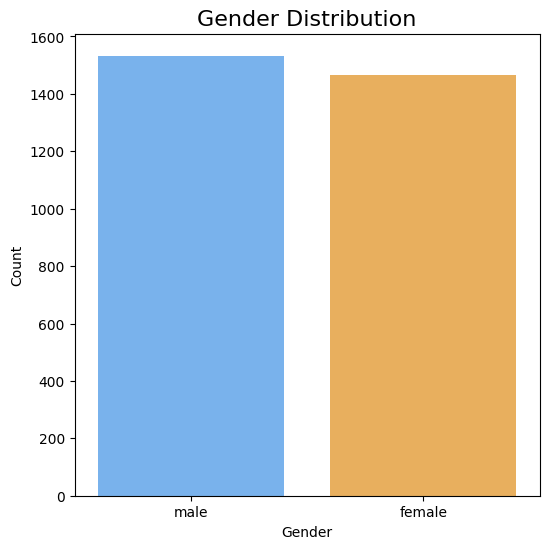

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=df, palette=["#66B2FF","#FFB347"])
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

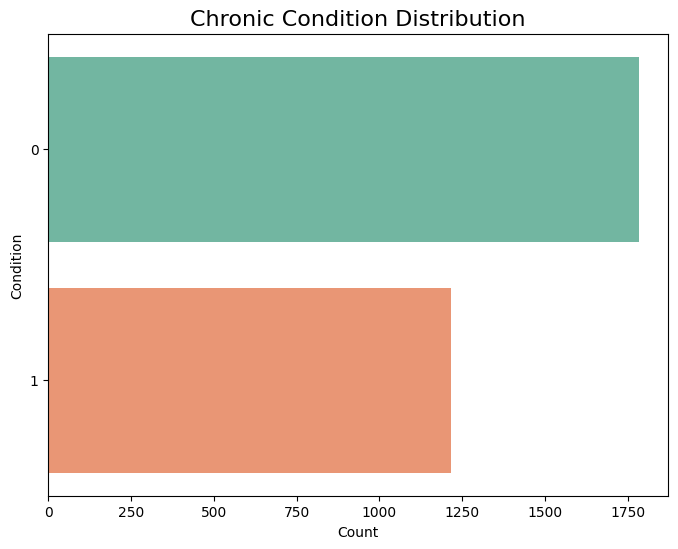

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(y='chronic_condition', data=df, palette='Set2', order=df['chronic_condition'].value_counts().index)
plt.title("Chronic Condition Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()

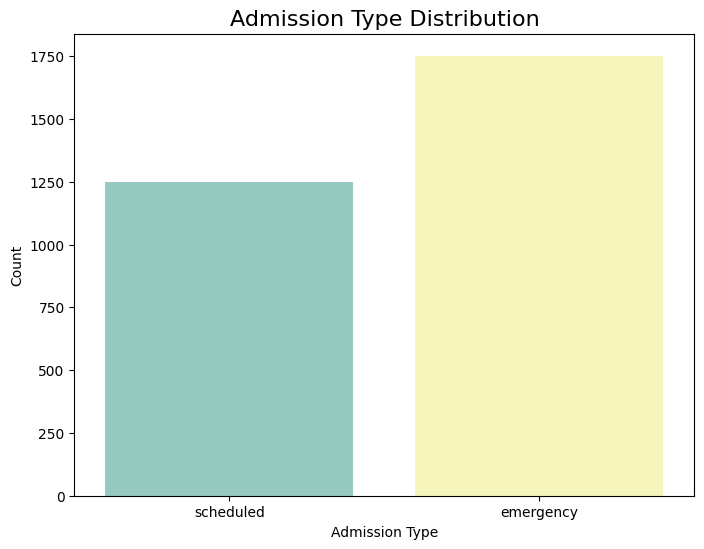

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='admission_type', data=df, palette='Set3')
plt.title("Admission Type Distribution", fontsize=16)
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

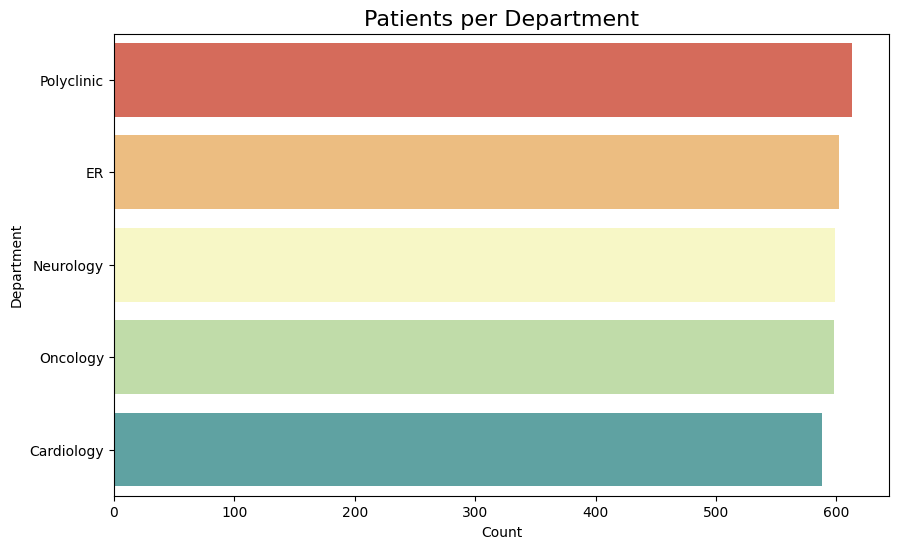

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y='department', data=df, palette='Spectral', order=df['department'].value_counts().index)
plt.title("Patients per Department", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()

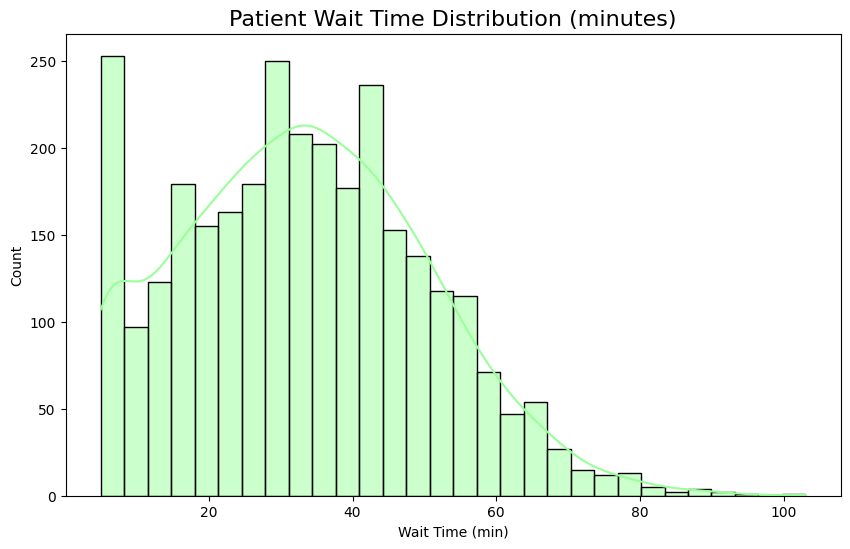

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['wait_time_min'], bins=30, kde=True, color="#99FF99")
plt.title("Patient Wait Time Distribution (minutes)", fontsize=16)
plt.xlabel("Wait Time (min)")
plt.ylabel("Count")
plt.show()

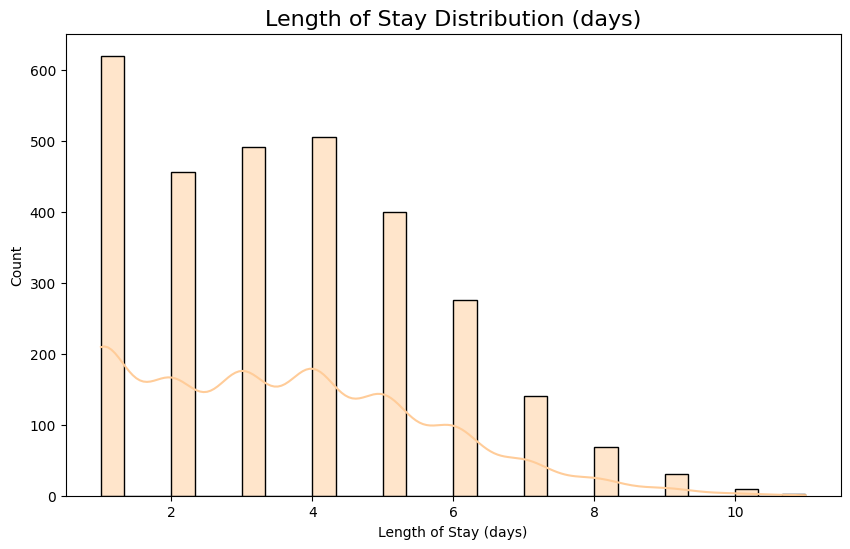

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['length_of_stay_days'], bins=30, kde=True, color="#FFCC99")
plt.title("Length of Stay Distribution (days)", fontsize=16)
plt.xlabel("Length of Stay (days)")
plt.ylabel("Count")
plt.show()


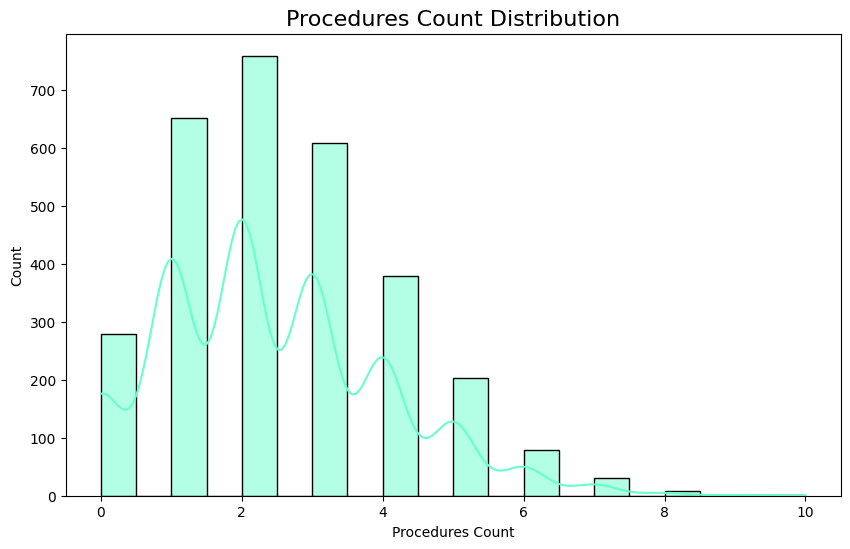

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['procedures_count'], bins=20, kde=True, color="#66FFCC")
plt.title("Procedures Count Distribution", fontsize=16)
plt.xlabel("Procedures Count")
plt.ylabel("Count")
plt.show()

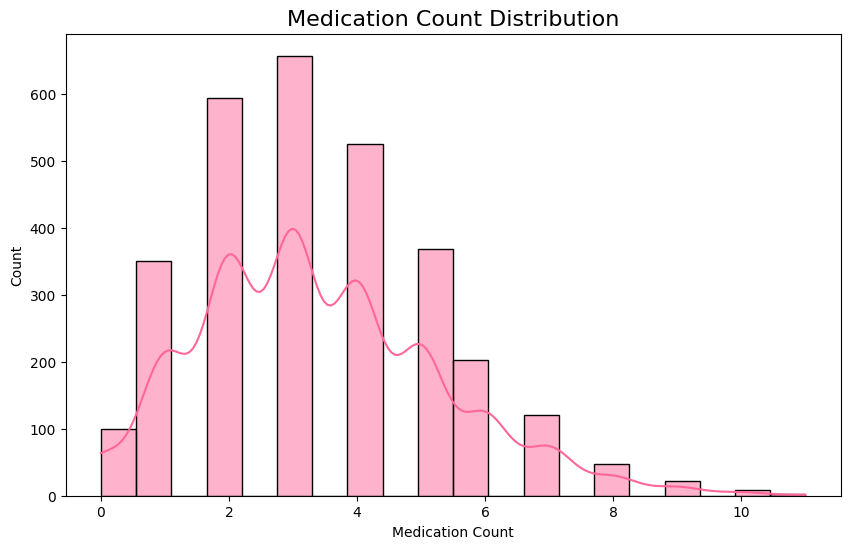

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['medication_count'], bins=20, kde=True, color="#FF6699")
plt.title("Medication Count Distribution", fontsize=16)
plt.xlabel("Medication Count")
plt.ylabel("Count")
plt.show()

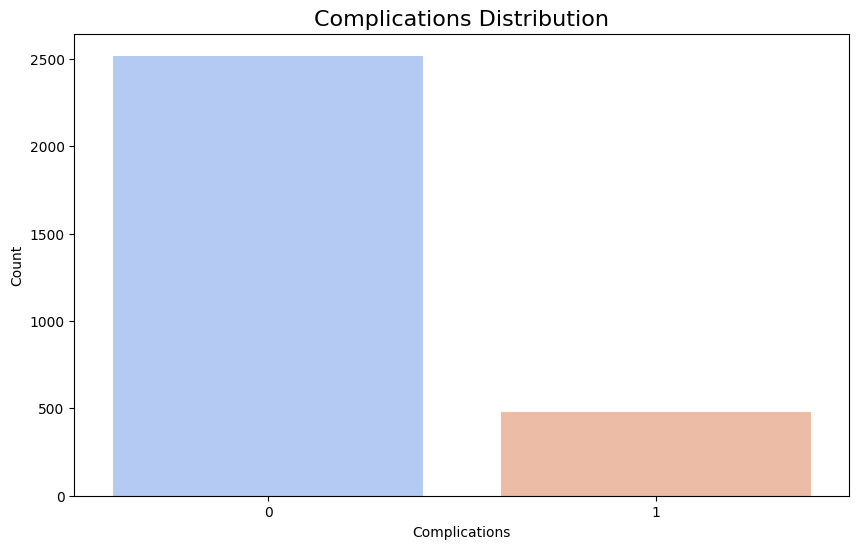

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='complications', data=df, palette='coolwarm')
plt.title("Complications Distribution", fontsize=16)
plt.xlabel("Complications")
plt.ylabel("Count")
plt.show()

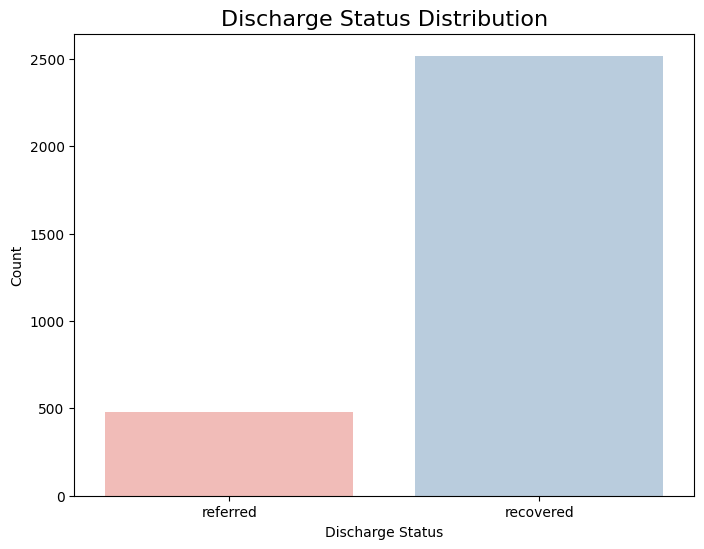

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='discharge_status', data=df, palette='Pastel1')
plt.title("Discharge Status Distribution", fontsize=16)
plt.xlabel("Discharge Status")
plt.ylabel("Count")
plt.show()

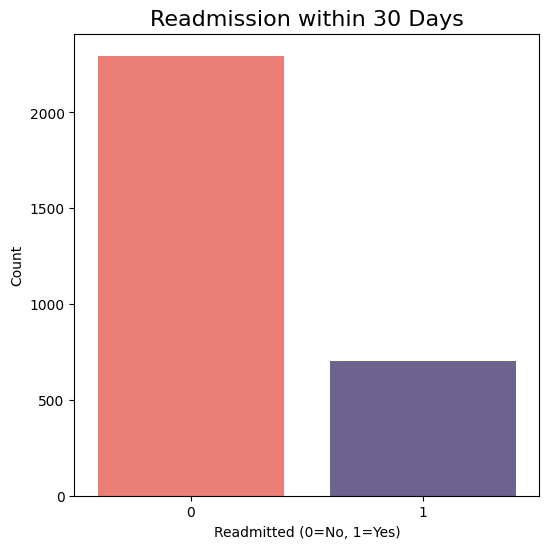

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='readmitted_30d', data=df, palette=['#FF6F61','#6B5B95'])
plt.title("Readmission within 30 Days", fontsize=16)
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


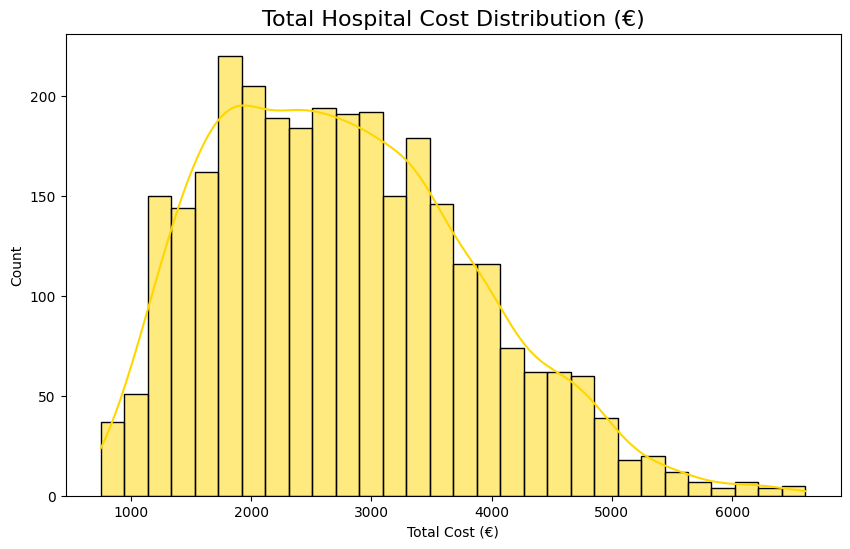

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['total_cost_€'], bins=30, kde=True, color="#FFD700")
plt.title("Total Hospital Cost Distribution (€)", fontsize=16)
plt.xlabel("Total Cost (€)")
plt.ylabel("Count")
plt.show()

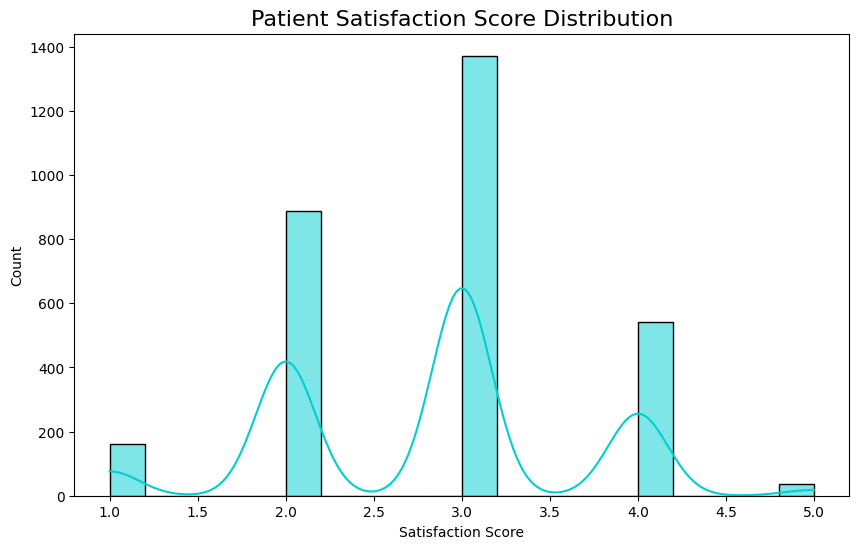

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_score'], bins=20, kde=True, color="#00CED1")
plt.title("Patient Satisfaction Score Distribution", fontsize=16)
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.show()

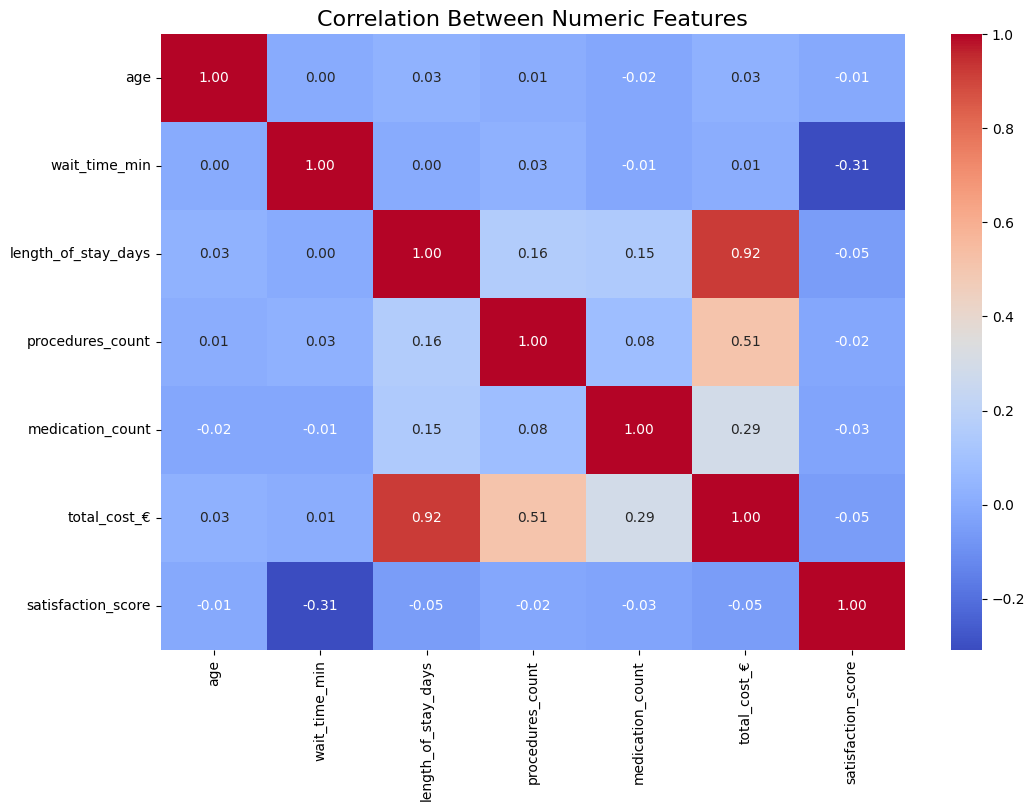

In [27]:
plt.figure(figsize=(12,8))
numeric_cols = ['age','wait_time_min','length_of_stay_days','procedures_count','medication_count','total_cost_€','satisfaction_score']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features", fontsize=16)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
categorical_cols = ['gender', 'chronic_condition', 'admission_type', 'department', 'discharge_status', 'complications']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # Store encoders if needed

# Features and Target
features = ['age', 'gender', 'chronic_condition', 'admission_type', 'department',
            'wait_time_min', 'length_of_stay_days', 'procedures_count', 'medication_count',
            'complications', 'discharge_status', 'total_cost_€', 'satisfaction_score']

X = df[features]
y = df['readmitted_30d']  # Target

# Optional: Scale numeric features for algorithms like KNN, SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

In [32]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, round(rmse,4), round(accuracy,2)])

In [33]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "Accuracy (%)"])
print("\nModel Performance:")
print(results_df.sort_values(by="Accuracy (%)", ascending=False))


Model Performance:
                 Model    RMSE  Accuracy (%)
0  Logistic Regression  0.4491         79.83
2                  SVM  0.4637         78.50
5          Naive Bayes  0.4690         78.00
1        Random Forest  0.4848         76.50
4                  KNN  0.5115         73.83
3        Decision Tree  0.5730         67.17


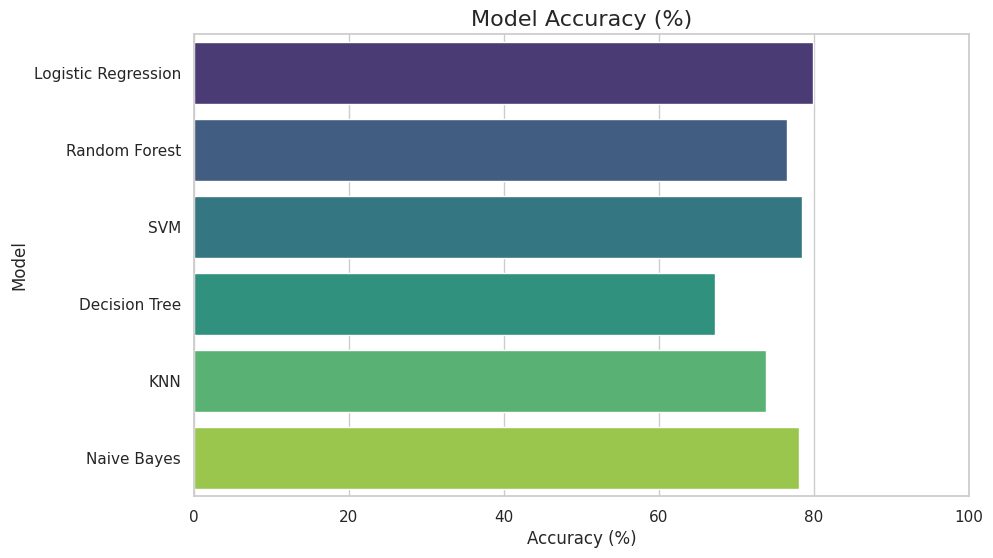

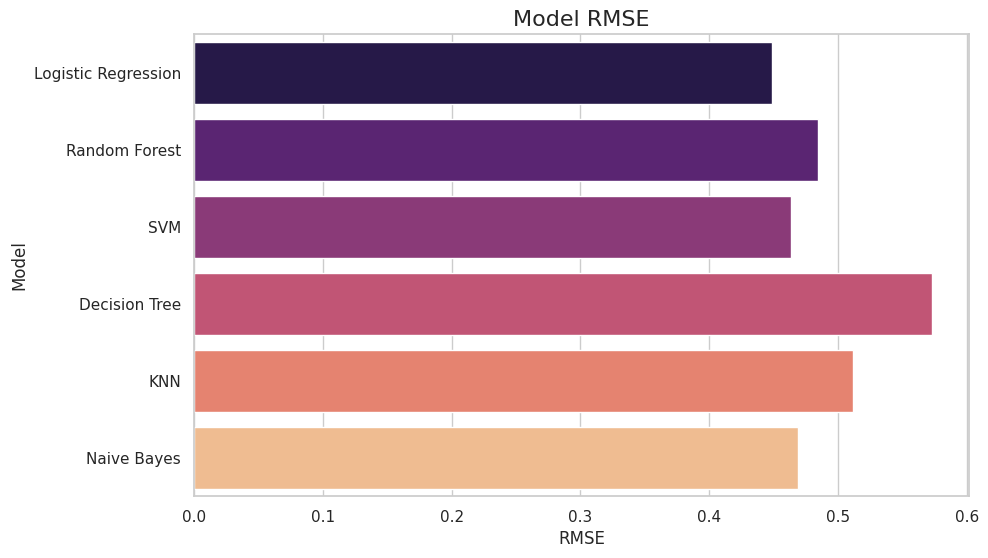

In [34]:
data = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Decision Tree", "KNN", "Naive Bayes"],
    "RMSE": [0.4491, 0.4848, 0.4637, 0.5730, 0.5115, 0.4690],
    "Accuracy (%)": [79.83, 76.50, 78.50, 67.17, 73.83, 78.00]
}

results_df = pd.DataFrame(data)

# Set Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy (%)", fontsize=16)
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0,100)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="RMSE", y="Model", data=results_df, palette="magma")
plt.title("Model RMSE", fontsize=16)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()

## Thank you..pls upvote!!!